# - Caso de Análisis Dataset Students -



#### =============================================
Este cuaderno comprende el análisis del dataset "Students Perfeormance in Exams" por medio de diferentes visualizaciones así como la construcción de un modelo predictivo que permita estimar el rendimiento en el curso de matemáticas.


Notas:
-Se usa el 80% de datos para Training y el 20% restante para Testing


Elaborado Por: Ronaldo Vindas Barboza 
#### =============================================

In [43]:
# ======================= Importación de Bibliotecas ======================= #
import pandas as pd                                                                     #Manejo de Dataframes
import numpy as np                                                                      #Manejo de Matrices        
from math import sqrt                                                                   #Funciones matemáticas
import matplotlib.pyplot as plt                                                         #Creación de gráficos
import seaborn as sns                                                                   #Biblioteca que facilita gráficos

from sklearn.preprocessing import MinMaxScaler                                          #Normalización de Dataframe

 # - = Lectura de Datos = - 

In [44]:
dataframe = pd.read_csv('StudentsPerformance.csv')                                                         #Creación de DataFrame a partir de un archivo CSV.

# shuffle the DataFrame rows
dataframe = dataframe.sample(frac = 1)                                                                     #Baraja de filas


#df_Training = dataframe.iloc[:800]                                                                         #Se divide el Training Set correspondiente al 80% de las filas del Dataset Original
#df_Testing = dataframe.iloc[801:]                                                                          #Se divide el Testing Set correspondiente al 20% de las filas del Dataset Original


#print(df_Training['species'].value_counts()) 
print(dataframe.describe)

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
589  female        group A            some high school      standard   
253    male        group D             master's degree      standard   
103    male        group B                 high school      standard   
210    male        group D            some high school  free/reduced   
1    female        group C                some college      standard   
..      ...            ...                         ...           ...   
735    male        group C             master's degree      standard   
260  female        group C            some high school  free/reduced   
299    male        group D          associate's degree  free/reduced   
644    male        group B                 high school      standard   
441  female        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
589                    none  

# - = Análisis Exploratorio Inicial de Características = - 


#### =============================================
Inicialmente, se observa que cinco de las ocho caracteristicas son categóricas, por lo que se realizan técnicas de Feature Engineering como One-Hot-Encoding para trasformar estos features de categóricos a númericos a coste de un pequeño incremento en la dimensionalidad del dataframe. de igual manera se normalizarán los datos numéricos para que todos los valores de los features se encuentren en el rango de valores de 0 y 1. <br>
Adicionalmente, no se visualizan valores faltantes. Existe un valor cero pero al tratarse del campo "math score" se deja pasar pues podría ser un resultado real.

#### =============================================

# - = Feature Engineering = - 

In [64]:
# ======================= One Hot Encoding ======================= #

#print(dataframe['gender'].unique())
#print(dataframe['race/ethnicity'].unique())
#print(dataframe['parental level of education'].unique())
#print(dataframe['lunch'].unique())
#print(dataframe['test preparation course'].unique())

categoricalFeatures = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
numericFeatures = ['math score', 'reading score', 'writing score']
allFeatures = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score', 'writing score']

oneHotEncodedDataframe = pd.get_dummies(dataframe, categoricalFeatures, dtype='int')
print(oneHotEncodedDataframe)


#scaler = MinMaxScaler()
#df[numeric_features] = scaler.fit_transform(df[numeric_features])


# ======================= Normalization ======================= #


scaler = MinMaxScaler()                                        #Inicializa Escalador
oneHotEncodedDataframe[numericFeatures] = scaler.fit_transform(oneHotEncodedDataframe[numericFeatures])

     math score  reading score  writing score  gender_female  gender_male  \
589          48             66             65              1            0   
253          80             80             72              0            1   
103          60             44             47              0            1   
210          80             79             79              0            1   
1            69             90             88              1            0   
..          ...            ...            ...            ...          ...   
735          67             57             59              0            1   
260          64             79             77              1            0   
299          90             87             75              0            1   
644          70             65             60              0            1   
441          78             81             80              1            0   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C

In [65]:
# ======================= Análisis Estadístico de Datos ======================= #

oneHotEncodedDataframe.describe()


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.660890,0.628542,0.645044,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.355000,0.645000,0.358000,0.642000
std,0.151631,0.175906,0.168841,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.478753,0.479652,0.479652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.570000,0.506024,0.530556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.638554,0.655556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.770000,0.746988,0.766667,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


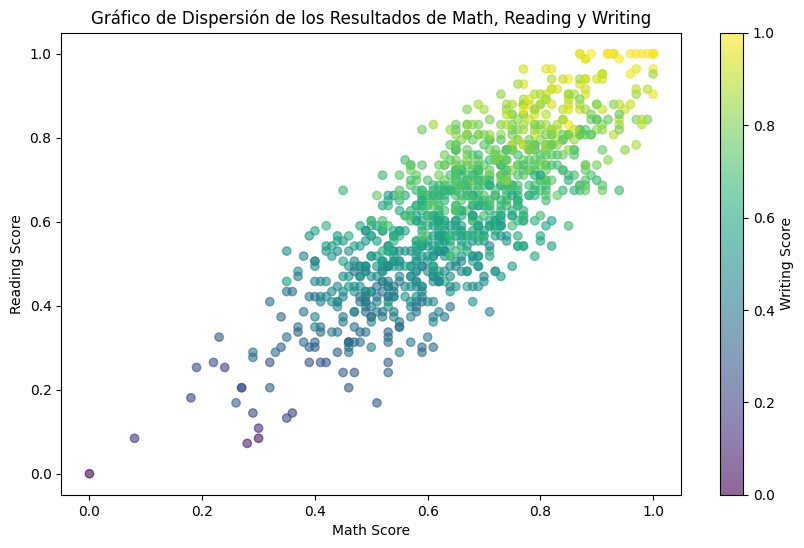

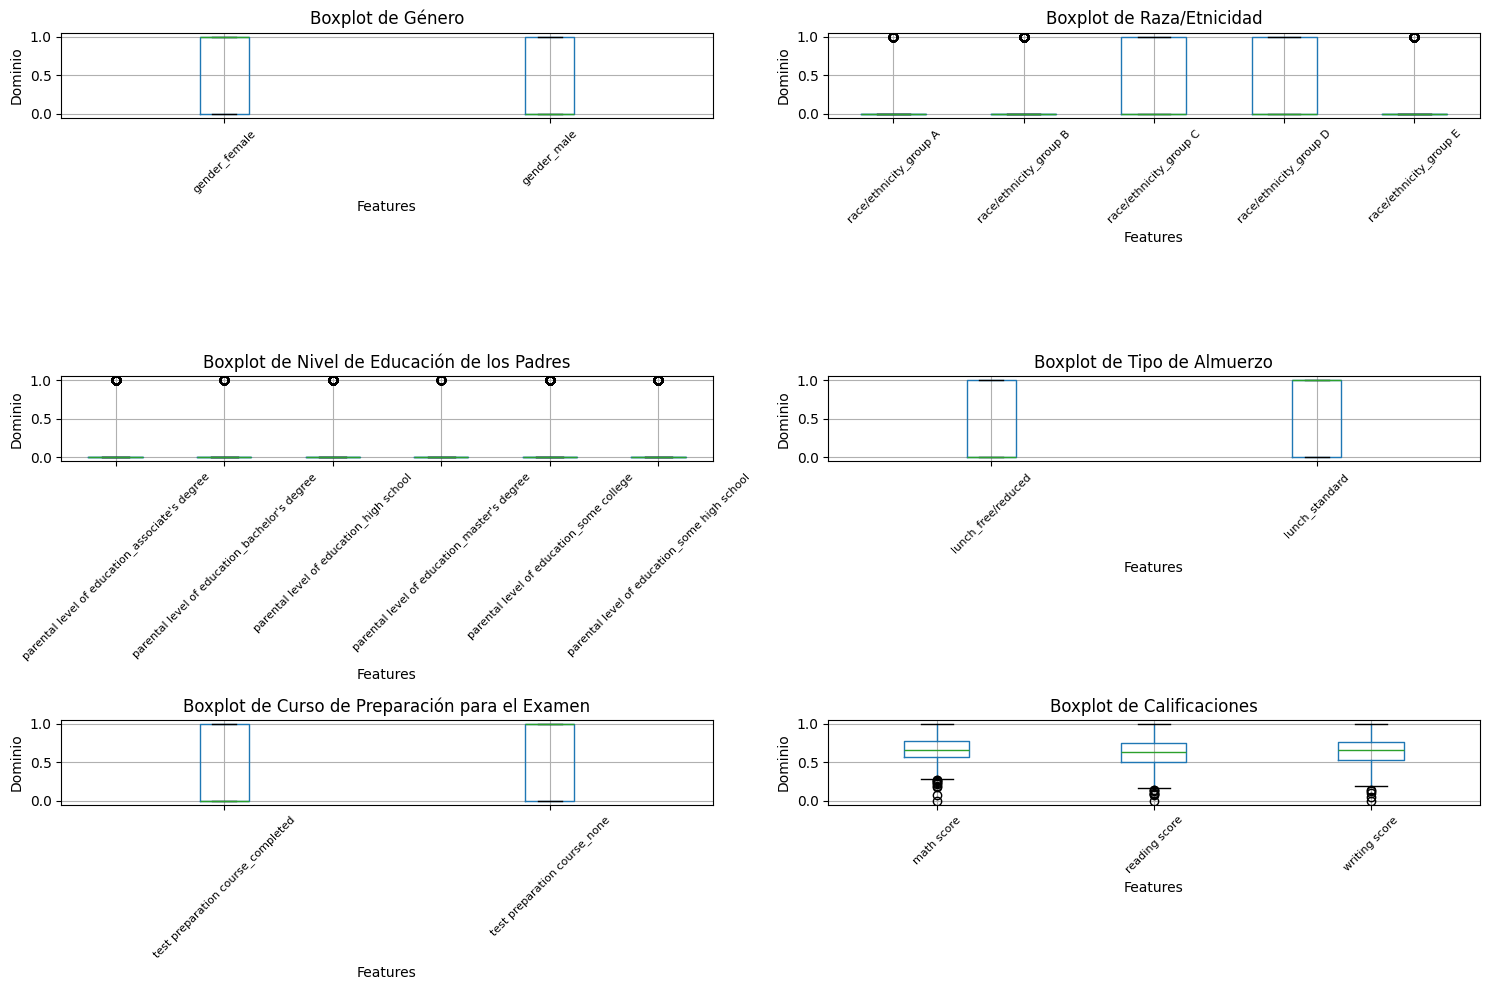

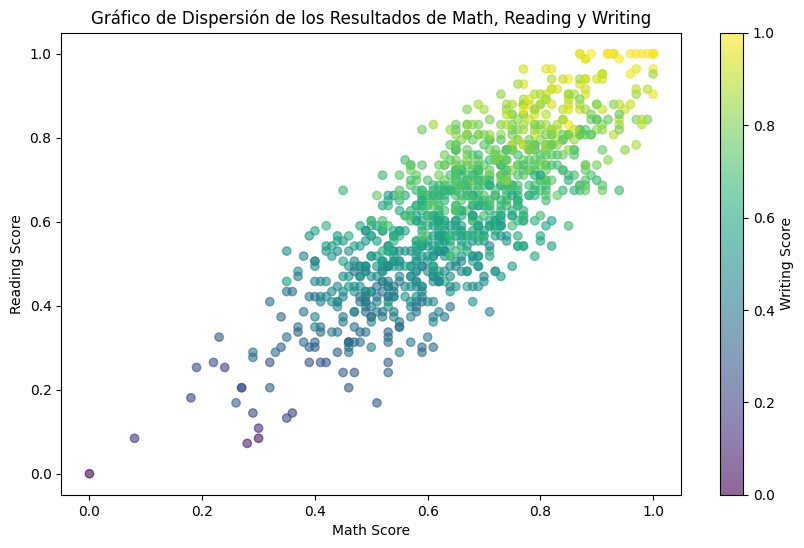

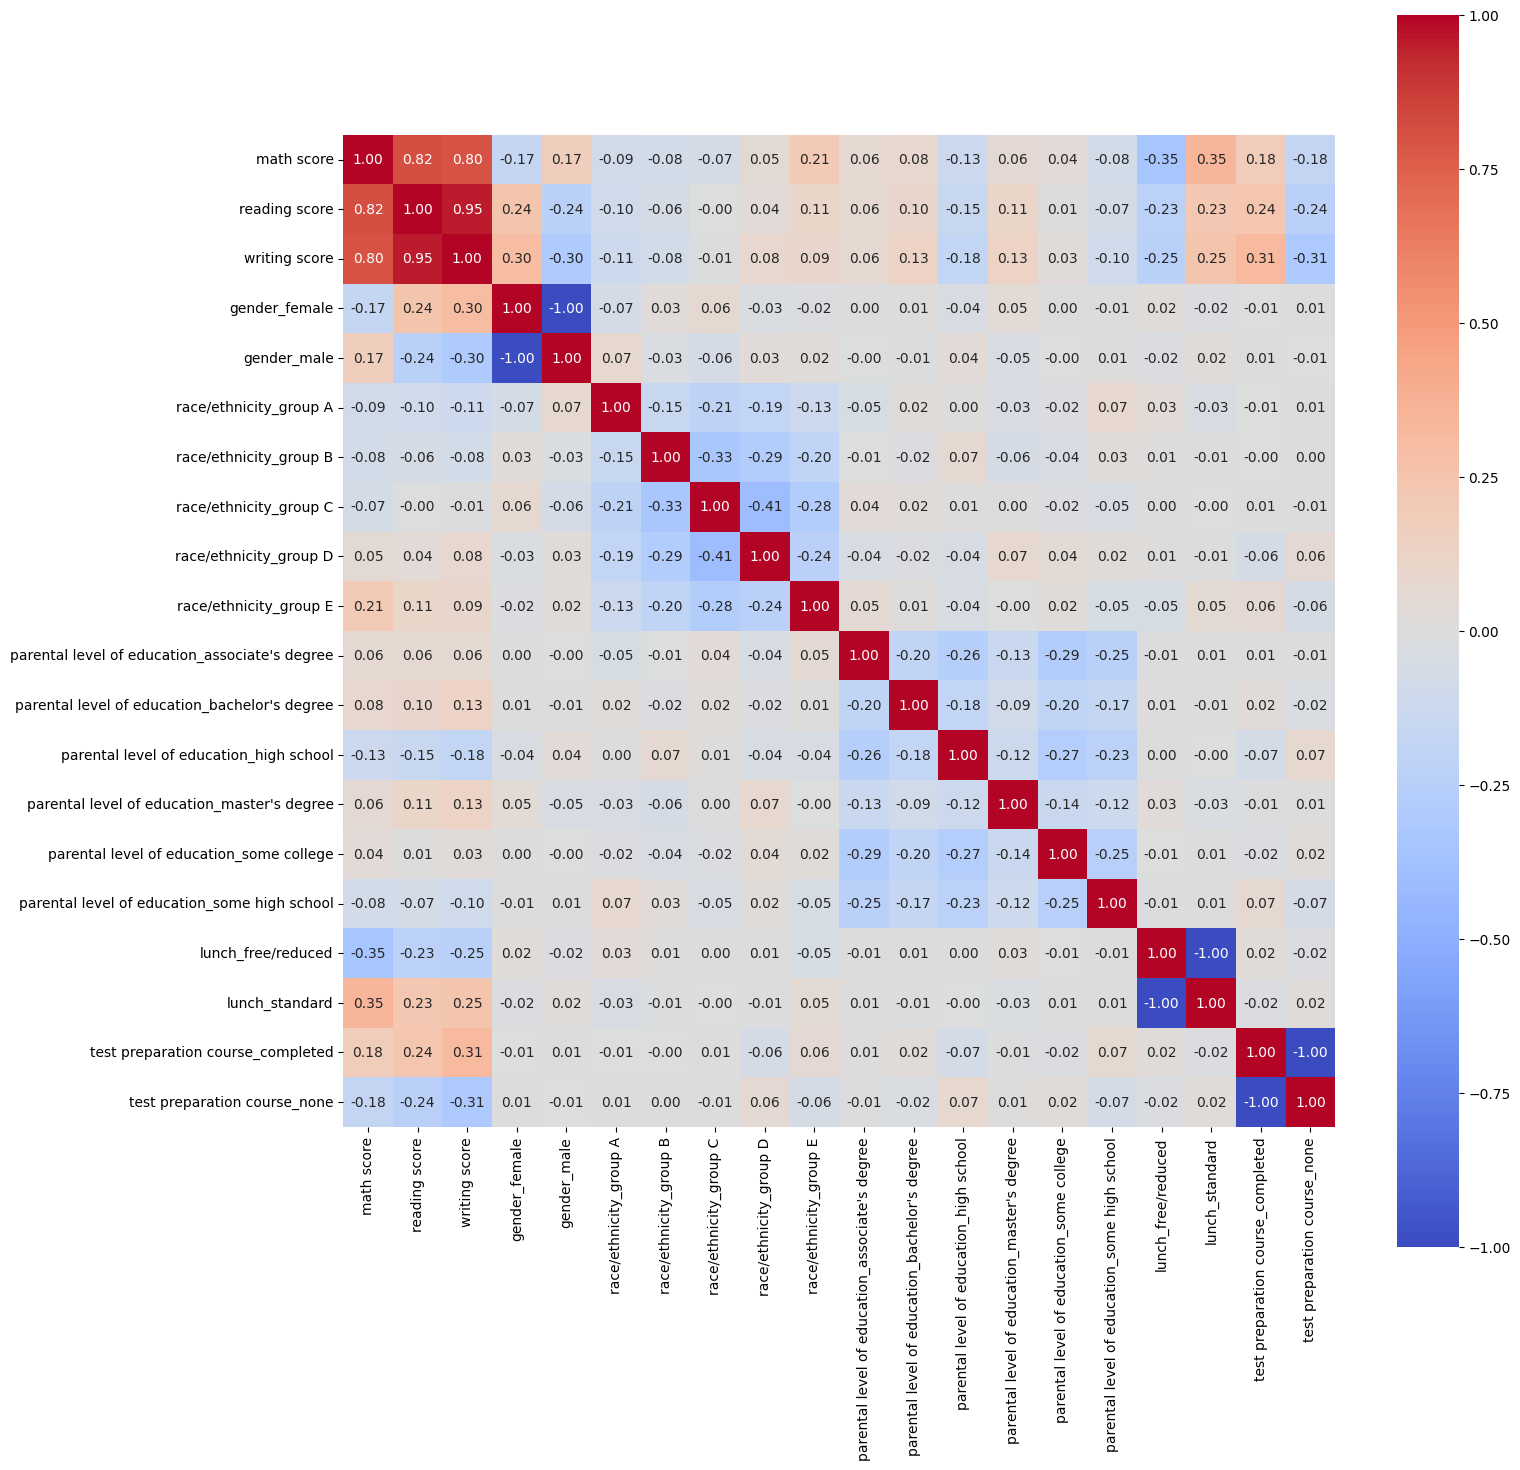

In [74]:
# ======================= Análisis Visual de Datos ======================= #

df = oneHotEncodedDataframe

#--->Gráfico BoxPlot

#Columnas de Dataframe tras One-Hot-Enconding

boxplotColumnsGender = ['gender_female','gender_male'] #, 'Outcome'
boxplotColumnsRace = ['race/ethnicity_group A','race/ethnicity_group B','race/ethnicity_group C','race/ethnicity_group D', 'race/ethnicity_group E'] #, 'Outcome'
boxplotColumnsEducation = ["parental level of education_associate's degree","parental level of education_bachelor's degree",
                            "parental level of education_high school","parental level of education_master's degree",
                            "parental level of education_some college","parental level of education_some high school"]
boxplotColumnsLunch = ['lunch_free/reduced','lunch_standard']
boxplotColumnsPreparation = ['test preparation course_completed','test preparation course_none']



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))                                #Crea figura y sobre ella una matriz de plots


boxplot_data = [                                                                            #Lista de datos y títulos para cada plot
    (boxplotColumnsGender, 'Boxplot de Género'),
    (boxplotColumnsRace, 'Boxplot de Raza/Etnicidad'),
    (boxplotColumnsEducation, 'Boxplot de Nivel de Educación de los Padres'),
    (boxplotColumnsLunch, 'Boxplot de Tipo de Almuerzo'),
    (boxplotColumnsPreparation, 'Boxplot de Curso de Preparación para el Examen'),
    (numericFeatures, 'Boxplot de Calificaciones')
]


for ax, (columns, title) in zip(axes.flat, boxplot_data):                                   #Se itera por cada uno de los datos para plottear
    df[columns].boxplot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Features')
    ax.set_ylabel('Dominio')
    ax.tick_params(axis='x', labelsize=8, rotation=45)


#fig.delaxes(axes[2][1])                                                                    #Elimina subplot en esa posición de la matriz             

plt.tight_layout()
plt.show()

#---> Gráficos de Dispersión:

colors = {'math score': 'red', 'reading score': 'green', 'writing score':'blue'}         #Se crea un diccionario que relaciona a cada materia con un color

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['math score'], df['reading score'], c=df['writing score'], cmap='viridis', alpha=0.6)

# Añadir color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Writing Score')

# Añadir etiquetas y título
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Gráfico de Dispersión de los Resultados de Math, Reading y Writing')
#scatter.grid(True) 
# Mostrar el gráfico
plt.show()



#--> Matriz de Correlación

correlationMatrix = df.corr()
threshold = 0
filteredCorrelation = correlationMatrix[(correlationMatrix >= threshold) | (correlationMatrix <= -threshold)]

plt.figure(figsize=(16, 16))
sns.heatmap(filteredCorrelation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()






╔====================================================================================================╗<br> 
<br>
El análisis visual de los datos muestra que:<br>

De acuerdo a los gráficos de Cajas: <br>








- Se puede observar como la diabetes se suele presentar principalmente en personas con un alto nivel de glucosa en la sangre y un alto índice de masa corporal. <br>
- Asimismo, los casos de diabetes positivos no parecen distinguir de edad, comenzando a diagnosticarse en su mayoría en edades tempranas.<br>
- El hecho de tener un ancestro con dicho diagnóstico, aumenta la probabilidad de que el paciente pueda llegar a ser diagnosticado con esta enfermedad.<br>
- Se presentan valores atípicos sobresalientes (outliers) en varias características del conjunto de datos, se deben realizar ajustes para que estos valores no entorpezcan los modelos.<br>

Según el gráfico de Cajas (BoxPlot): <br>
- Se destaca cómo varios de los features presentan valores atípicos, principalmente el feature de 'Insulina' y 'Presión Sanguínea'. En el caso de la Insulina, es fácil notar que existen muchos valores con un nivel atipico <br>

El análisis estadístico de los datos muestra que:<br>

- El Conjunto de Datos usado para el Training se encuentra algo más sesgado a mostrar casos negativos que pueden perjudicar los modelos de predicción Se debería balancear un poco más la cantidad de ejemplos positivos y negativos. <br> 
- Existen muchos valores faltantes, principalmente en los features "Insulina" y "Grosor de la Piel". Se trabajarán métodos de imputación de datos para corregirlos.<br>
- Los valores de "Glucosa" suelen estar muy desvíados respecto del promedio <br>
- La "Insulina" tiene un valor máximo de 846, cantidad exagerada para el nivel promedio (Debe ser menos de 180). La cantidad de ejemplos mayores a esta cantidad es de 90. Se puede trabajar en cambiar los datos más exagerados por el mayor nivel permitido o bien eliminar el ejemplo. <br>
- Existen casos donde la probabilidad de padecer Diabetes de acuerdo a un caso hereditario es de 2 (¿?)<br>
<br>


<br>
Se están permitiendo algunos outliers
<br>
<br>
╚====================================================================================================╝